# Colors (ggplot2)
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to use colors in a graph with ggplot2.

## Solution
The default colors in ggplot2 can be difficult to distinguish from one another because they have equal luminance. They are also not friendly for colorblind viewers.

A good general-purpose solution is to just use the colorblind-friendly palette below.

## Sample data
These two data sets will be used to generate the graphs below.

In [1]:
# Two variables
df <- read.table(header=TRUE, text='
 cond yval
    A 2
    B 2.5
    C 1.6
')

# Three variables
df2 <- read.table(header=TRUE, text='
 cond1 cond2 yval
    A      I 2
    A      J 2.5
    A      K 1.6
    B      I 2.2
    B      J 2.4
    B      K 1.2
    C      I 1.7
    C      J 2.3
    C      K 1.9
')

### Simple color assignment

The colors of lines and points can be set directly using `colour="red"`, replacing “red” with a color name. The colors of filled objects, like bars, can be set using `fill="red"`.

If you want to use anything other than very basic colors, it may be easier to use hexadecimal codes for colors, like `"#FF6699"`. (See the hexadecimal color chart below.)

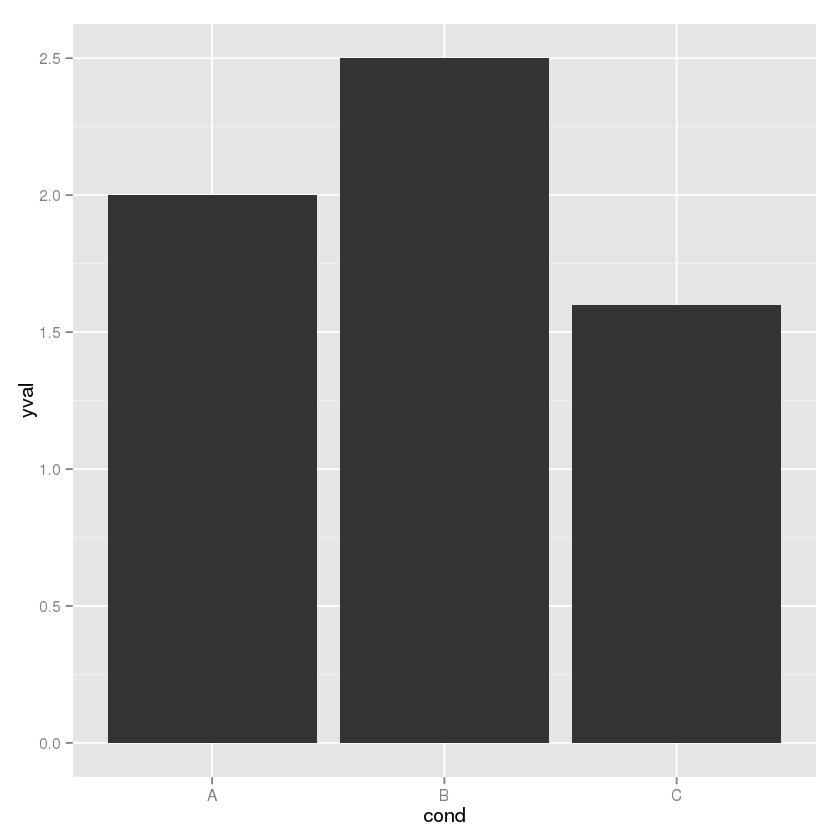

In [2]:
library(ggplot2)
# Default: dark bars
ggplot(df, aes(x=cond, y=yval)) + geom_bar(stat="identity")

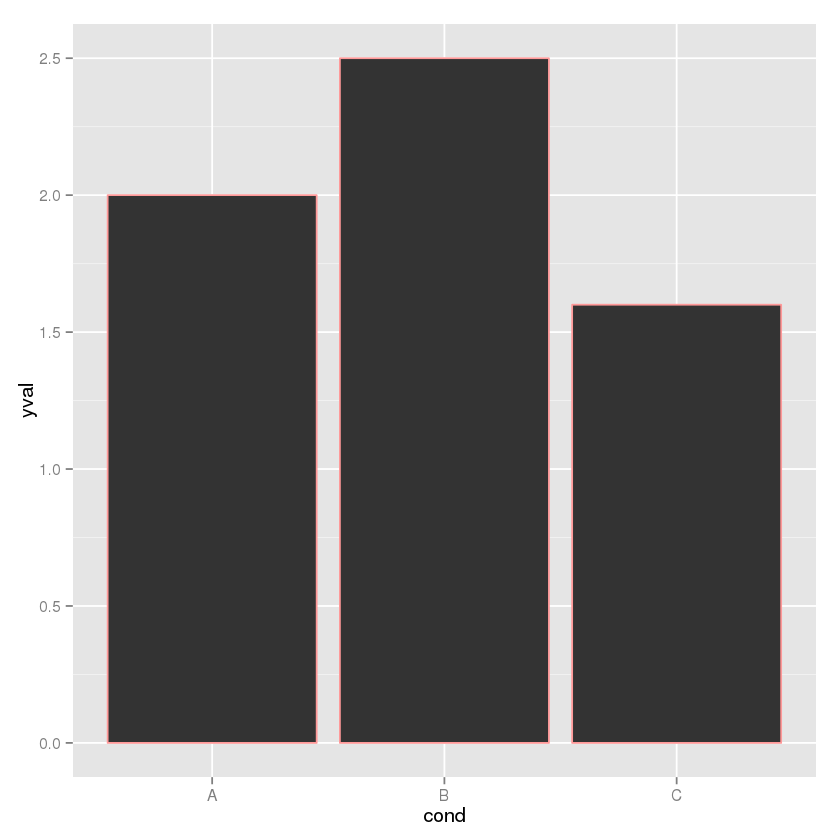

In [3]:
# Bars with red outlines
ggplot(df, aes(x=cond, y=yval)) + geom_bar(stat="identity", colour="#FF9999") 

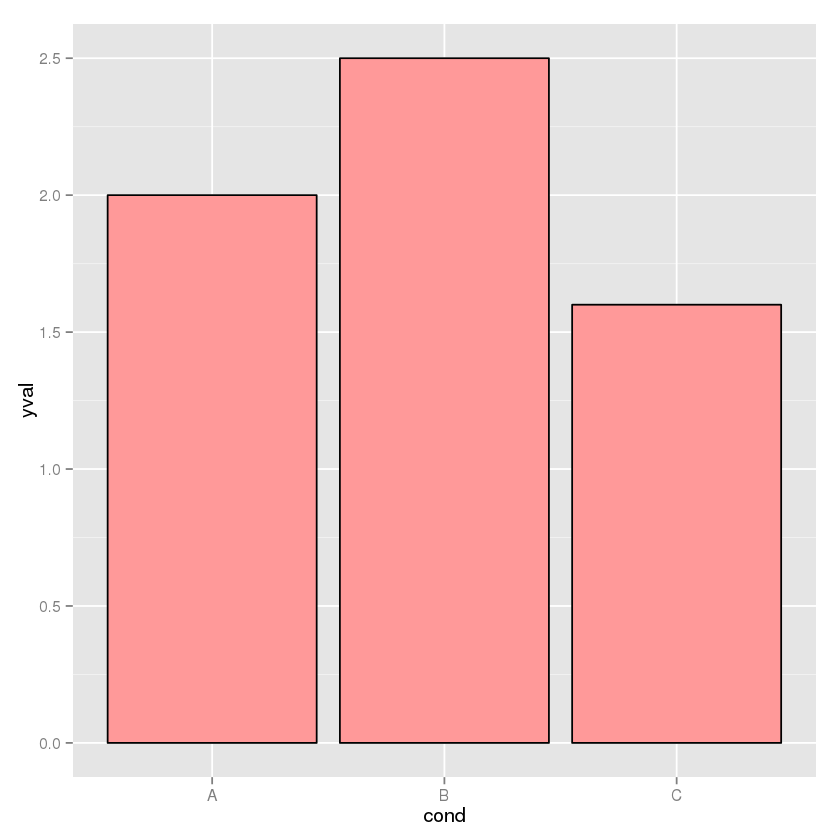

In [4]:
# Red fill, black outlines
ggplot(df, aes(x=cond, y=yval)) + geom_bar(stat="identity", fill="#FF9999", colour="black")

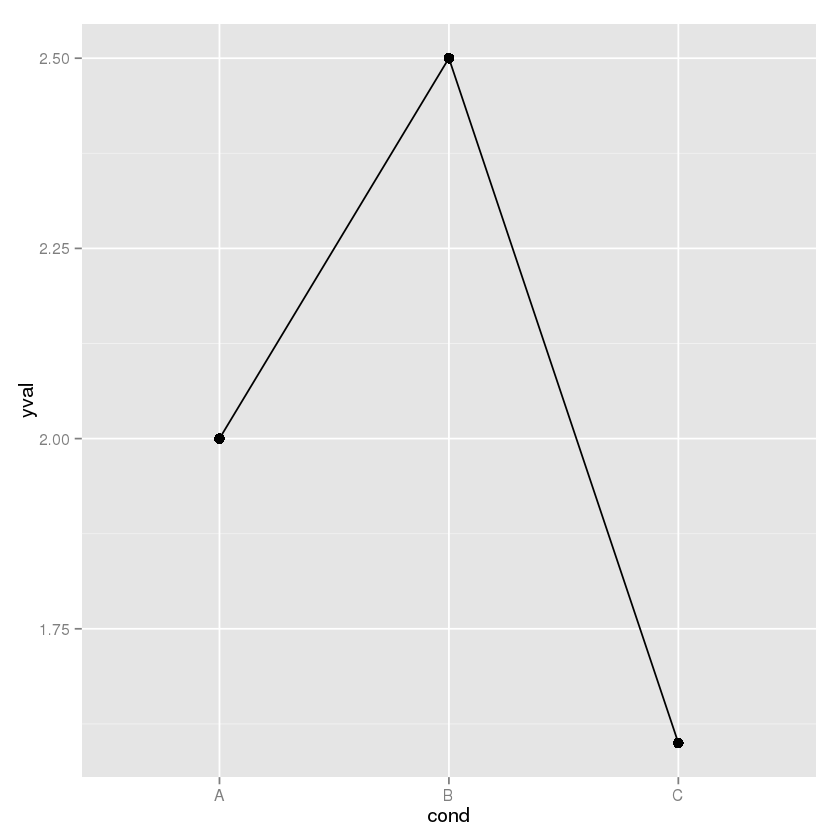

In [5]:
# Standard black lines and points
ggplot(df, aes(x=cond, y=yval)) + 
    geom_line(aes(group=1)) +     # Group all points; otherwise no line will show
    geom_point(size=3)

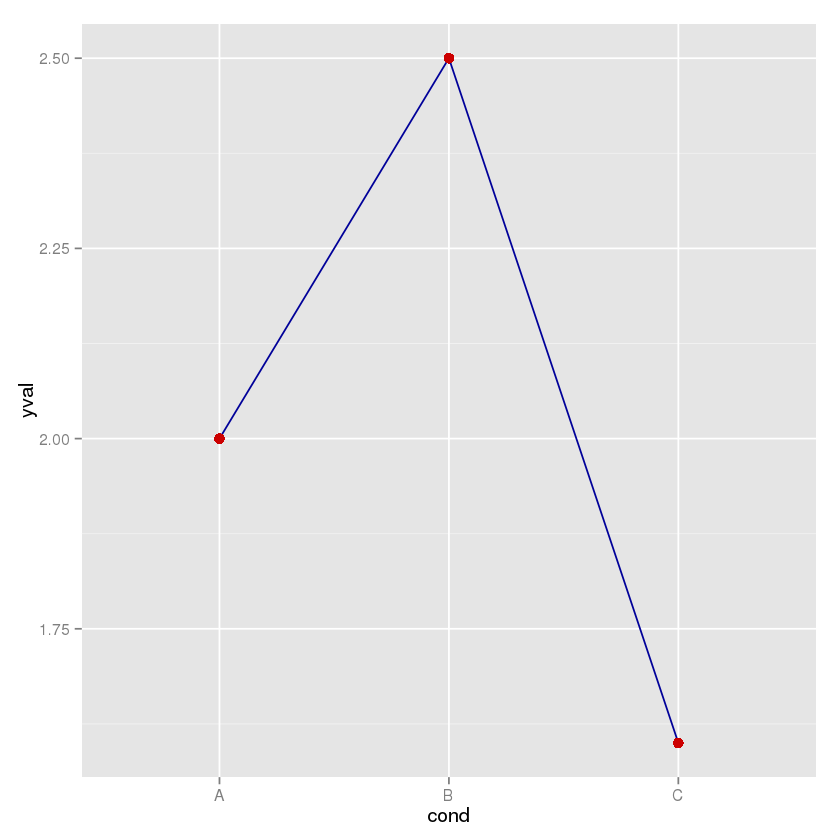

In [6]:
# Dark blue lines, red dots
ggplot(df, aes(x=cond, y=yval)) + 
    geom_line(aes(group=1), colour="#000099") +  # Blue lines
    geom_point(size=3, colour="#CC0000")         # Red dots

### Mapping variable values to colors

Instead of changing colors globally, you can map variables to colors – in other words, make the color conditional on a variable, by putting it inside an `aes()` statement.

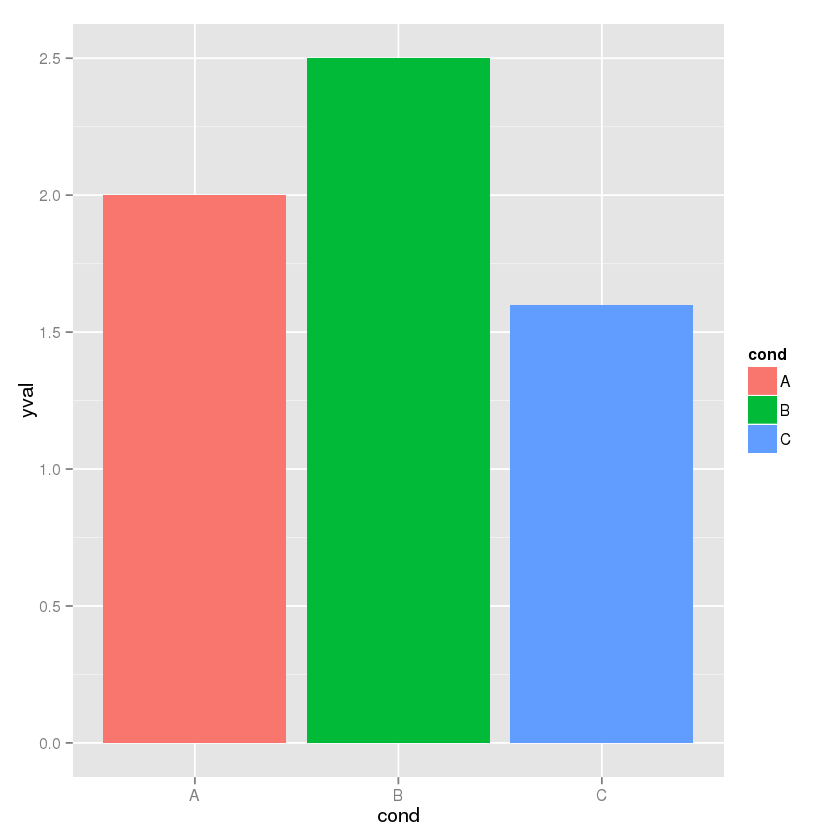

In [7]:
# Bars: x and fill both depend on cond2
ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity")

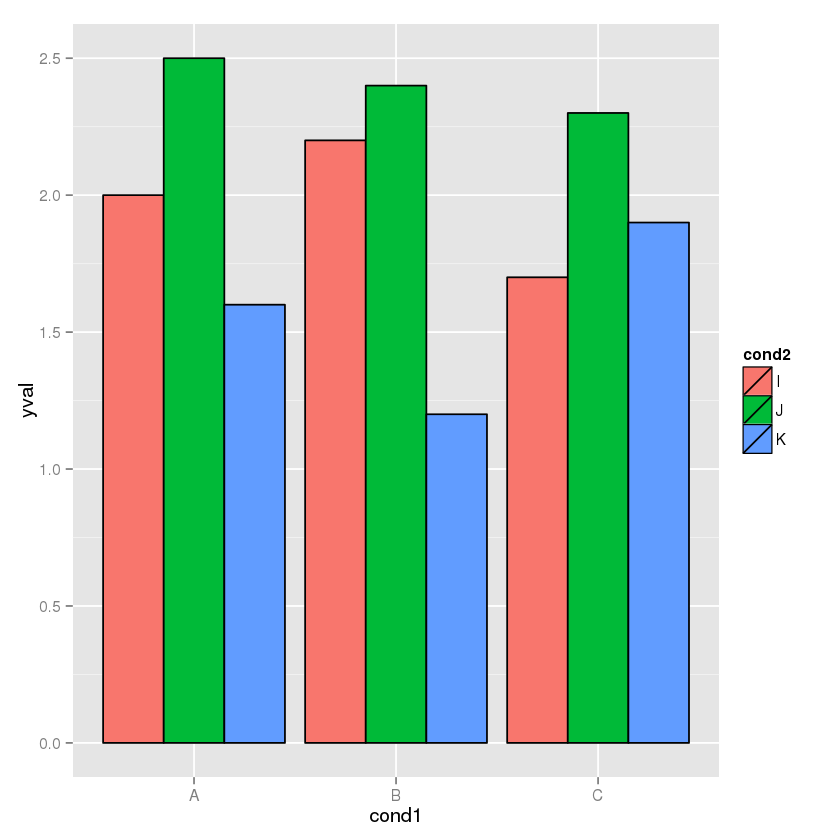

In [8]:
# Bars with other dataset; fill depends on cond2
ggplot(df2, aes(x=cond1, y=yval)) + 
    geom_bar(aes(fill=cond2),   # fill depends on cond2
             stat="identity",
             colour="black",    # Black outline for all
             position=position_dodge()) # Put bars side-by-side instead of stacked

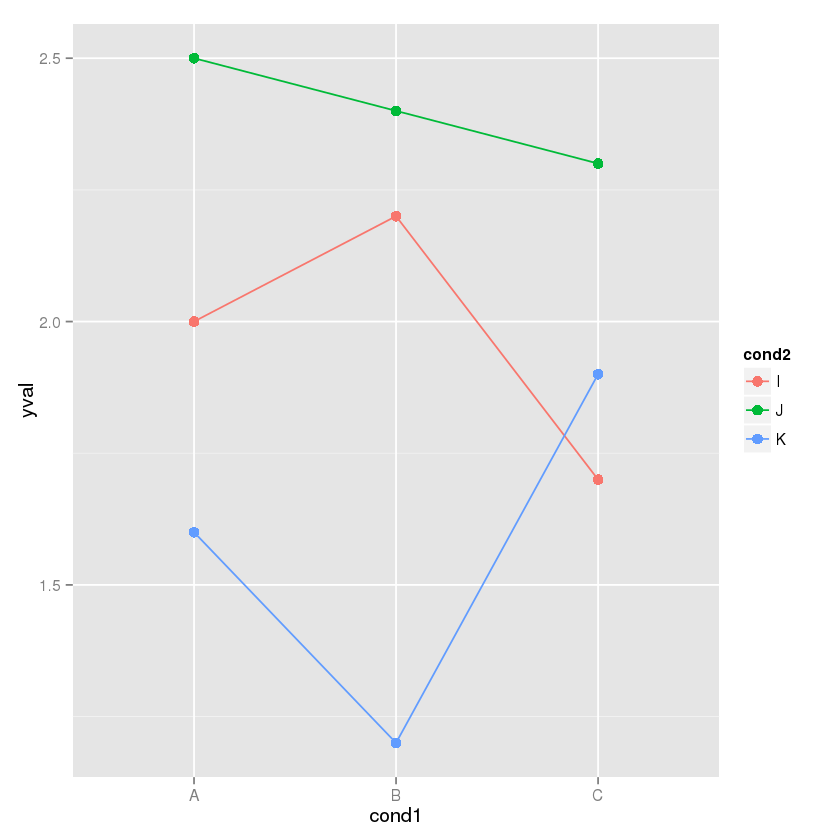

In [9]:
# Lines and points; colour depends on cond2
ggplot(df2, aes(x=cond1, y=yval)) + 
    geom_line(aes(colour=cond2, group=cond2)) + # colour, group both depend on cond2
    geom_point(aes(colour=cond2),               # colour depends on cond2
               size=3)                          # larger points, different shape
## Equivalent to above; but move "colour=cond2" into the global aes() mapping
# ggplot(df2, aes(x=cond1, y=yval, colour=cond2)) + 
#    geom_line(aes(group=cond2)) +
#    geom_point(size=3)

### A colorblind-friendly palette

These are color-blind-friendly palettes, one with gray, and one with black.

<table><tr>
<td><img src="http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/figure/unnamed-chunk-5-1.png"/></td> <td><img src="http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/figure/unnamed-chunk-5-2.png"/></td>
</tr></table>

To use with ggplot2, it is possible to store the palette in a variable, then use it later.

In [10]:
# The palette with grey:
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# The palette with black:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

In [11]:
# To use for fills, add
  scale_fill_manual(values=cbPalette)

discrete_scale(aesthetics = aesthetic, scale_name = "manual", 
    palette = pal)

In [12]:
# To use for line and point colors, add
  scale_colour_manual(values=cbPalette)

discrete_scale(aesthetics = aesthetic, scale_name = "manual", 
    palette = pal)

This palette is from <a href="http://jfly.iam.u-tokyo.ac.jp/color/">http://jfly.iam.u-tokyo.ac.jp/color/</a>:

<img src="http://jfly.iam.u-tokyo.ac.jp/color/image/pallete.jpg">

### Color selection

By default, the colors for discrete scales are evenly spaced around a HSL color circle. For example, if there are two colors, then they will be selected from opposite points on the circle; if there are three colors, they will be 120° apart on the color circle; and so on.
The colors used for different numbers of levels are shown here:

<img src="http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/figure/unnamed-chunk-7-1.png">

The default color selection uses `scale_fill_hue()` and `scale_colour_hue()`. For example, adding those commands is redundant in these cases:

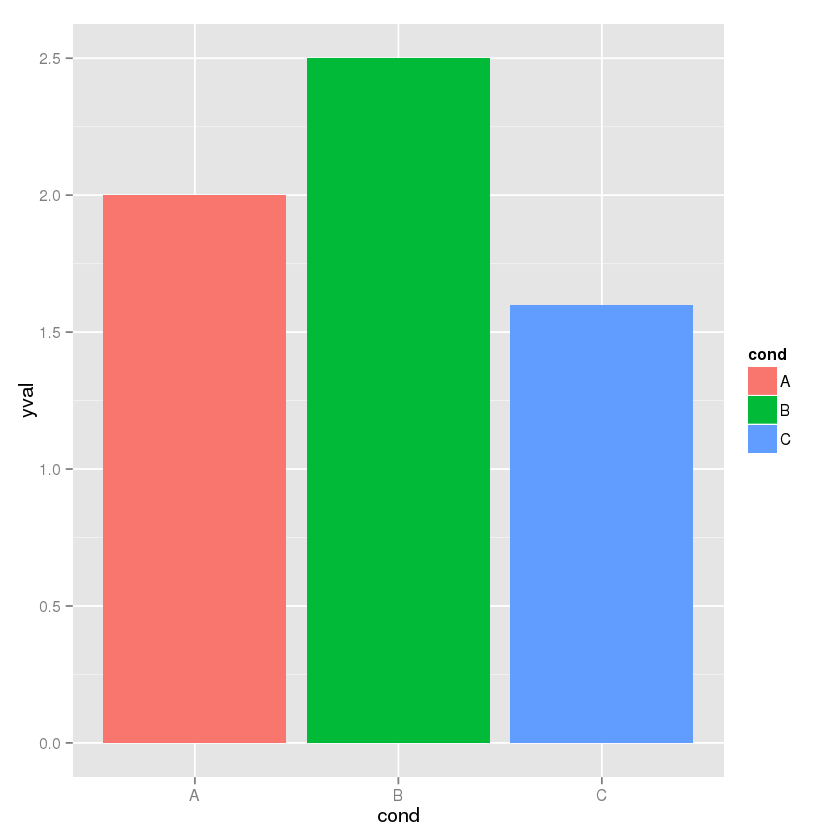

In [13]:
# These two are equivalent; by default scale_fill_hue() is used
ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity")
# ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity") + scale_fill_hue()

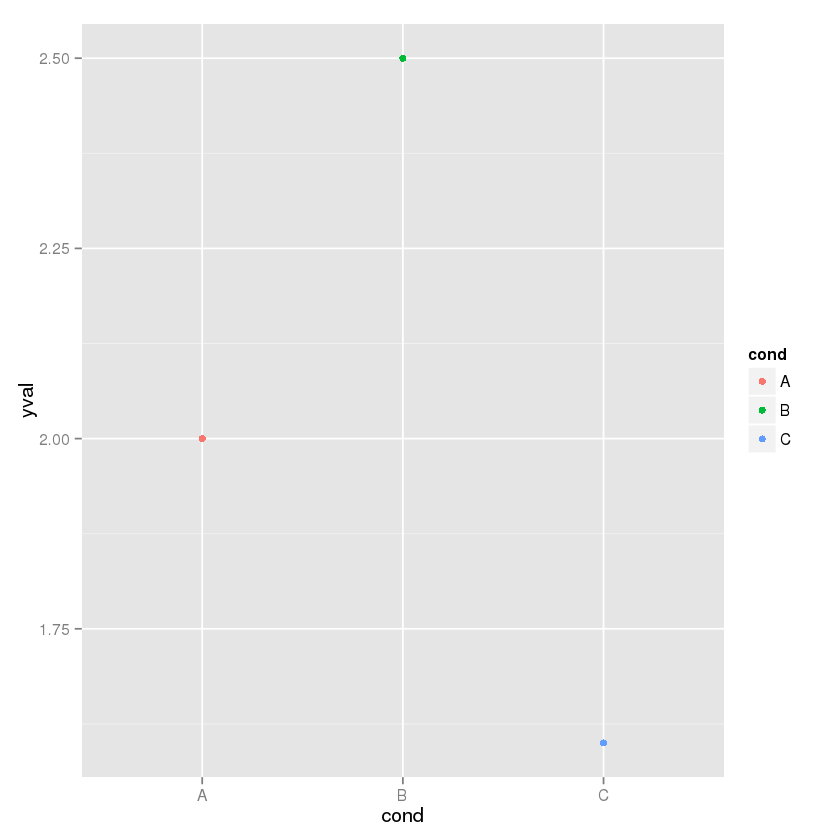

In [14]:
# These two are equivalent; by default scale_colour_hue() is used
ggplot(df, aes(x=cond, y=yval, colour=cond)) + geom_point(size=2)
# ggplot(df, aes(x=cond, y=yval, colour=cond)) + geom_point(size=2) + scale_colour_hue()

### Setting luminance and saturation (chromaticity)

Although `scale_fill_hue()` and `scale_colour_hue()` were redundant above, they can be used when you want to make changes from the default, like changing the luminance or chromaticity.

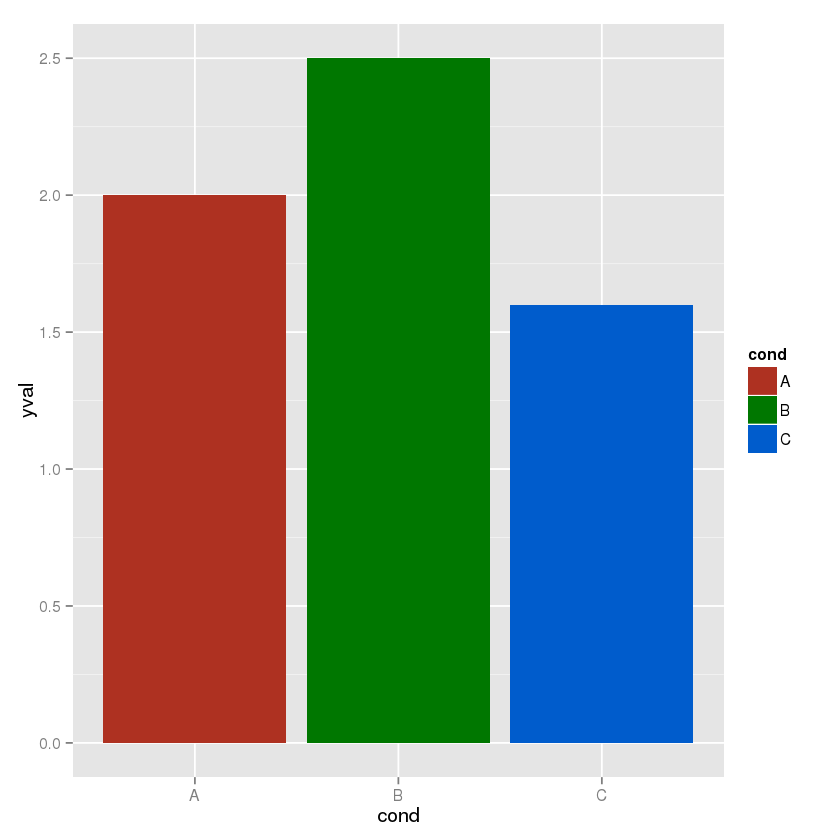

In [15]:
# Use luminance=45, instead of default 65
ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity") +
    scale_fill_hue(l=40)

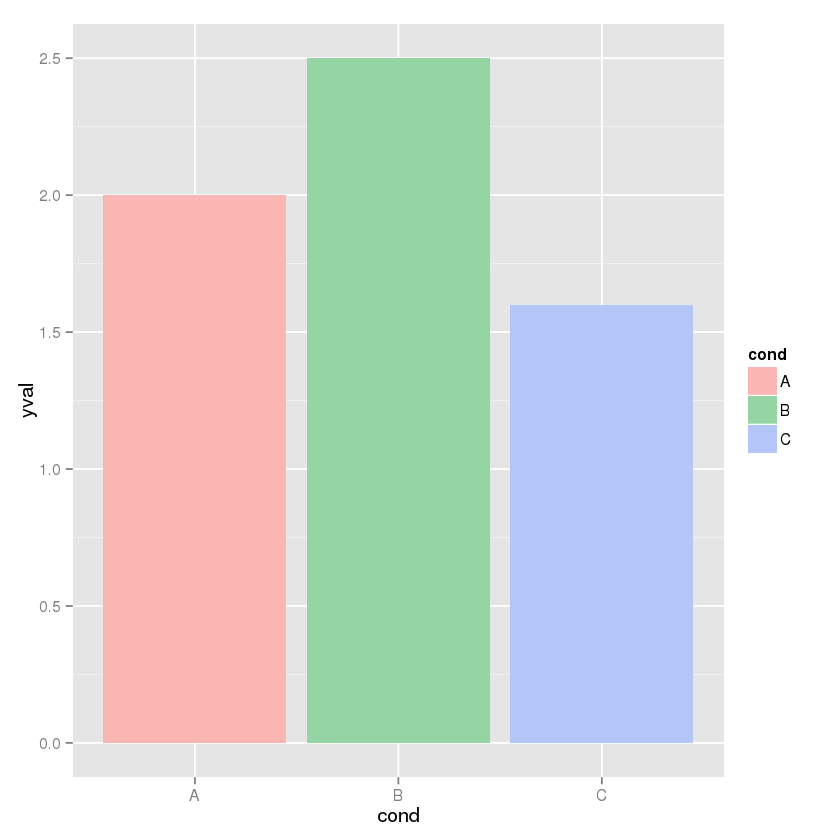

In [16]:
# Reduce saturation (chromaticity) from 100 to 50, and increase luminance
ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity") +
    scale_fill_hue(c=45, l=80)

# Note: use scale_colour_hue() for lines and points

This is a chart of colors with luminance=45:

<img src="http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/figure/unnamed-chunk-10-1.png">

### Palettes: Color Brewer

You can also use other color scales, such as ones taken from the RColorBrewer package. See the chart of RColorBrewer palettes below. See the scale section here for more information.

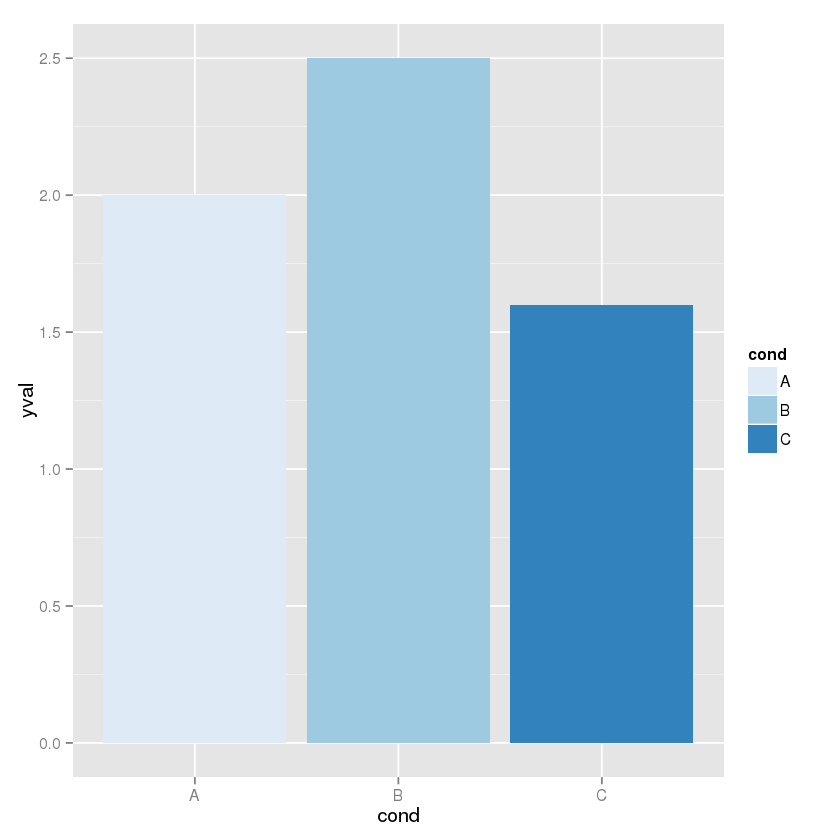

In [17]:
ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity") +
    scale_fill_brewer()

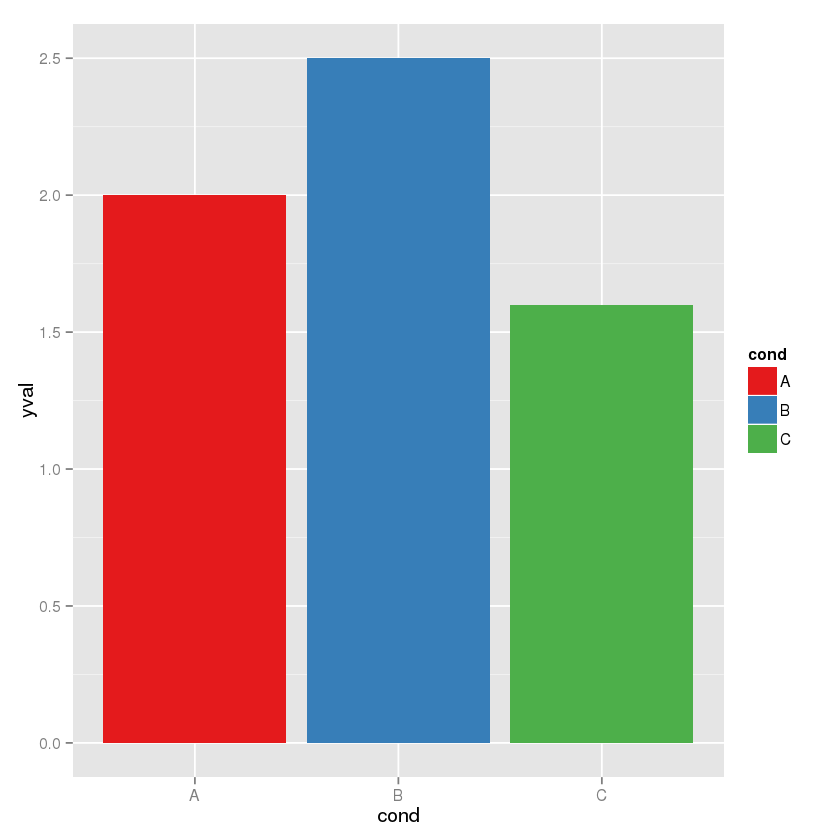

In [18]:
ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity") +
    scale_fill_brewer(palette="Set1")

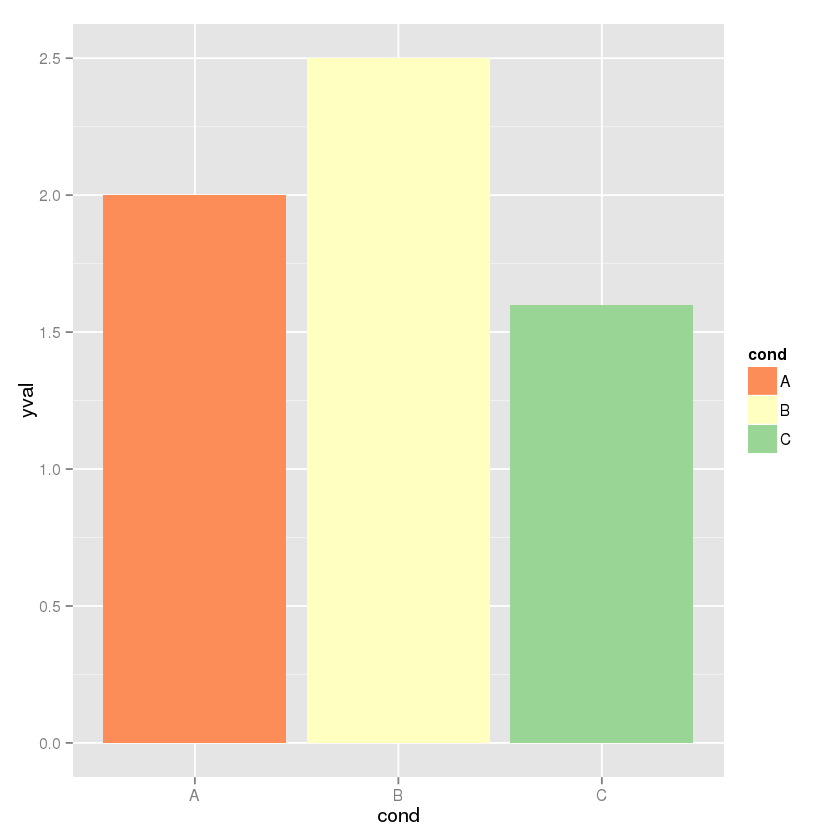

In [19]:
ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity") +
    scale_fill_brewer(palette="Spectral")

# Note: use scale_colour_brewer() for lines and points

### Palettes: manually-defined

Finally, you can define your own set of colors with scale_fill_manual(). See the hexadecimal code chart below for help choosing specific colors.

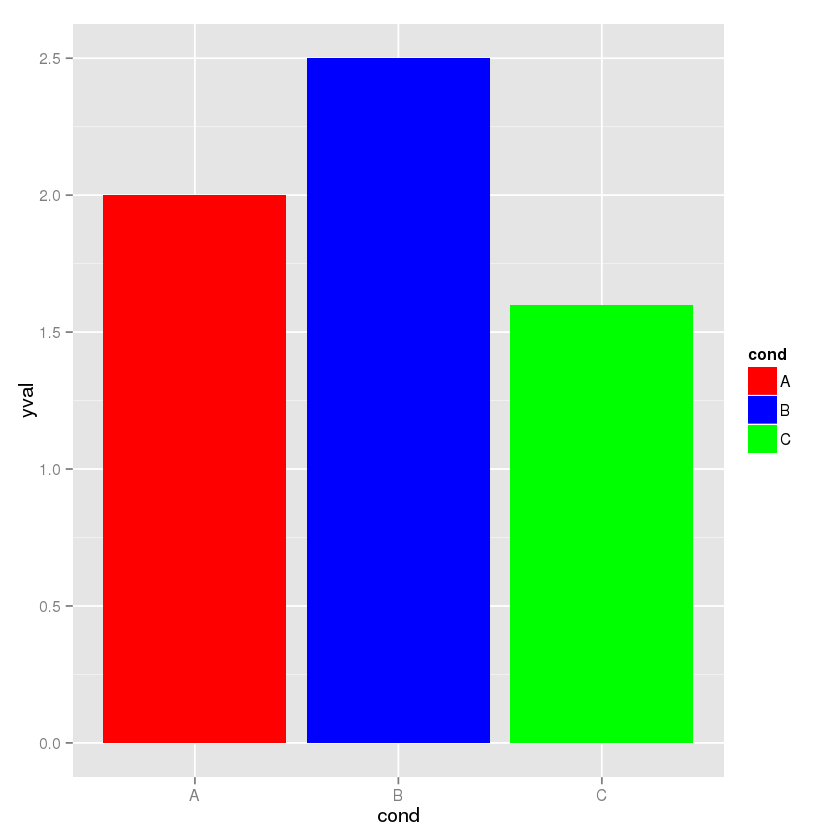

In [20]:
ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity") + 
    scale_fill_manual(values=c("red", "blue", "green"))

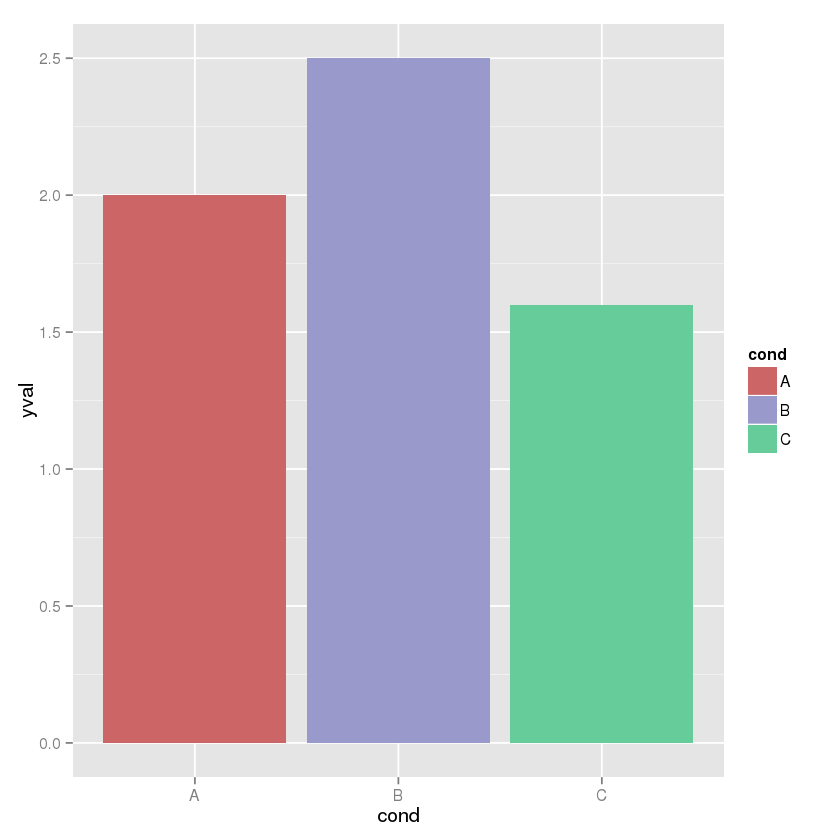

In [21]:
ggplot(df, aes(x=cond, y=yval, fill=cond)) + geom_bar(stat="identity") + 
    scale_fill_manual(values=c("#CC6666", "#9999CC", "#66CC99"))

# Note: use scale_colour_manual() for lines and points

## Continuous colors

[Not complete]

See the scale section <a href="http://had.co.nz/ggplot2/">here</a> for more information.

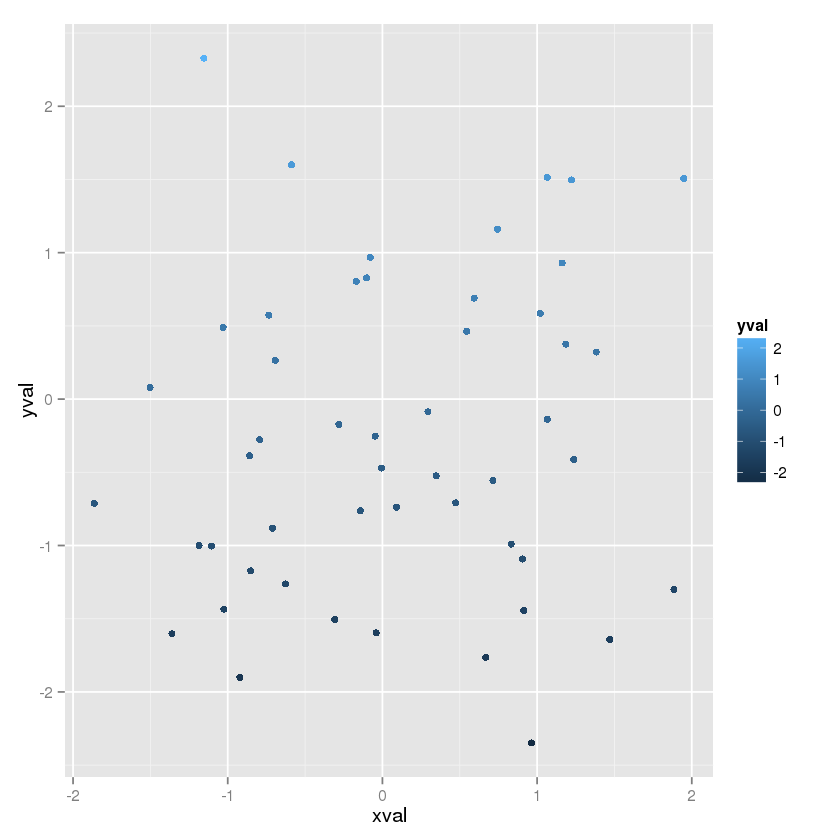

In [22]:
# Generate some data
set.seed(133)
df <- data.frame(xval=rnorm(50), yval=rnorm(50))

# Make color depend on yval
ggplot(df, aes(x=xval, y=yval, colour=yval)) + geom_point()

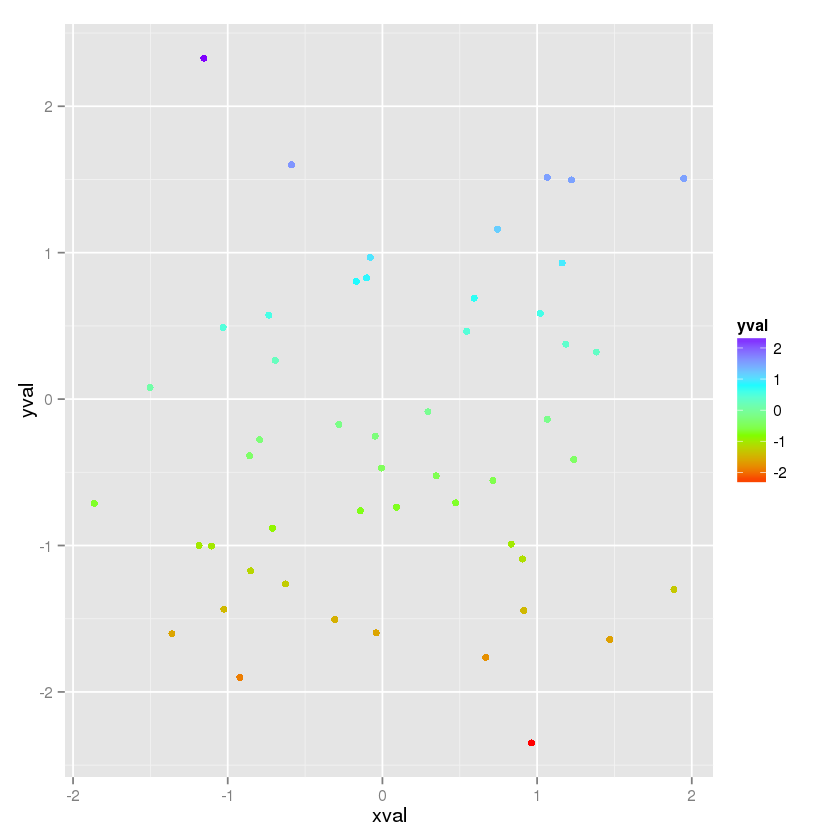

In [23]:
# Use a different gradient
ggplot(df, aes(x=xval, y=yval, colour=yval)) + geom_point() + 
    scale_colour_gradientn(colours=rainbow(4))

### Color charts

Hexadecimal color code chart

Colors can specified as a hexadecimal RGB triplet, such as `"#0066CC"`. The first two digits are the level of red, the next two green, and the last two blue. The value for each ranges from 00 to FF in hexadecimal (base-16) notation, which is equivalent to 0 and 255 in base-10. For example, in the table below, “#FFFFFF” is white and “#990000” is a deep red.

<img src="http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/hextable.png">

(Color chart is from http://www.visibone.com)

### RColorBrewer palette chart
<img src="http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/figure/unnamed-chunk-14-1.png">